# Assignment for Dr. X

   ## Sara Schwarz

## Install packages in terminal

### > conda install biopython

## Import

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Question 1

In [5]:
def get_sequences_from_file(fasta_fn): # Define function as "get_sequences_from_file" of a fasta file
    sequence_data_dict = {} # Create an empty dictionary called "sequence_data_dict"
    for record in SeqIO.parse(fasta_fn, "fasta"): # For every record in the "Seq10.parse" fasta file:
        description = record.description.split() # Split description field into multiple fields and label fields as "description"
        species_name = description[1] + " " + description[2] # Add species names (description 1 and 2 fields) as strings together
        sequence_data_dict[species_name] = record.seq # Add species names to dictionary and record sequences
    return(sequence_data_dict) # Return (or print) the output value(s) of the loop

In [8]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # Assign sequences from penguin file to cytb_seqs object

In [9]:
print(cytb_seqs['Aptenodytes forsteri']) # Print sequence for Aptenodytes forsteri so it can be used to test translate function

ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCA

## Question 2

In [121]:
def translate_function(string_nucleotides): # Define function as "translate_function" which can be used on a string of nucleotides
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #  Table that defines codons set as object "mito_table"
    aa_string = "" # Form string from amino acid data
    for x in range(0,len(string_nucleotides)-3, 3): # For every value (x) in range 0 to the length of the string count by three:
        codon = string_nucleotides[x : x + 3] # Assign codon as an object for each set of three nucleotides as a string
        aa_string = aa_string + mito_table.forward_table[codon] # String together the amino acids and the codon string
    return(aa_string) # Return the string of amino acids
#http://www.petercollingridge.co.uk/python-bioinformatics-tools/codon-table

In [122]:
translate_function("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")
# Test translate function

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

## Question 3

In [165]:
def translate_function_alternative(dict): # Define function as "translate_function_alternative" which can be used on a dictionary
    for key in cytb_seqs.items(): # For every key in the cytb_seqs file:
        aa_string = value.translate(table="Vertebrate Mitochondrial") # Assign aa_string as an object that has been translated for each key from the codon table. Default continues full translation past stop codon.
    return(aa_string) # Return the string of amino acids
#http://biopython.org/DIST/docs/api/Bio.Seq.Seq-class.html#translate

In [166]:
translate_function_alternative("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...NH*', HasStopCodon(ExtendedIUPACProtein(), '*'))

## Question 4

In [125]:
def compute_molecular_weight(aa_string):
    analysed_seq = ProteinAnalysis(aa_string)
    return(analysed_seq.molecular_weight())

In [126]:
compute_molecular_weight("MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH")
# Test function with amino acid sequence

42459.602100000004

## Question 5

In [127]:
def compute_GC_content(aa_string):
        total = len(aa_string)
        c = aa_string.count("C")
        g = aa_string.count("G")
        gc_total = g+c
        gc_content = gc_total/total
        print(gc_content)
#https://stackoverflow.com/questions/16908475/beginner-python-script-for-calculating-gc-content-in-dna-sequence

In [128]:
compute_GC_content("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")
# Test code from from fasta sequence file

0.48381452318460194


## Question 6

### Import data

In [129]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [130]:
penguins_df["molecular_weight"] = np.nan # Add molecular weight column with all entries as "NaN"
#https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe

In [131]:
penguins_df["GC_content"] = np.nan # Add GC content column with all entries as "NaN"

In [132]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## Question 7

In [138]:
row_counter = 0 # Set row count to zero
for key, value in cytb_seqs.items(): # For each key in cytb_seqs file:
    aa_string = translate_function(str(value)) # Translate string of amino acids and save as object "aa_string"
    molecular_weight_table = compute_molecular_weight(aa_string) # Compute molecular weight of each translated sequence
    gc_content_table = compute_GC_content(aa_string) # Compute GC content of each translated sequence
    penguins_df.set_value(row_counter, 'molecular_weight', molecular_weight_table) # Set row value as calculated molecular weight
    penguins_df.set_value(row_counter, 'GC_content', gc_content_table) # Set row value as caclulated GC content
    row_counter = row_counter + 1 # Repeat the for loop for every row in the cytb_seqs file
    
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe

0.07368421052631578
0.07368421052631578
0.07368421052631578
0.07368421052631578
0.07368421052631578
0.07368421052631578
0.07368421052631578
0.07105263157894737
0.07105263157894737
0.07368421052631578
0.07105263157894737
0.07368421052631578


In [139]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,NaN
1,Aptenodytes patagonicus,13.40,42563.7067,NaN
2,Eudyptes chrysocome,2.80,42475.5753,NaN
3,Eudyptes chrysolophus,4.50,42445.5493,NaN
4,Eudyptes sclateri,4.25,42475.5753,NaN
5,Eudyptula minor,1.60,42491.6408,NaN
6,Pygoscelis adeliae,4.60,42458.6140,NaN
7,Pygoscelis antarctica,4.10,42404.5423,NaN
8,Pygoscelis papua,6.10,42595.8759,NaN
9,Spheniscus demersus,3.20,42431.5490,NaN


## Question 8

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

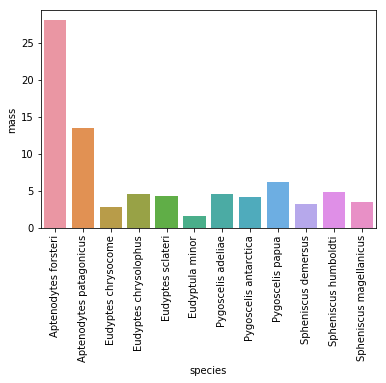

In [135]:
mass_bar = sns.barplot(x="species", y="mass", data=penguins_df)
plt.xticks(rotation=90)

#https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
#http://www.iucnredlist.org/details/22697805/0
           

#### Q1 The smallest penguin species is the Eudyptula minor (common name Little Penguin or Fairy Penguin)
#### Q2 They are a non migratory penguin endemic to Austrailia and New Zealand

## Question 9

In [99]:
mass_bar = sns.barplot(x="GC content", y="molecular weight", data=penguins_df)
plt.xticks(rotation=90)

#https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

ValueError: min() arg is an empty sequence

## Question 10

In [70]:
penguins_df.to_csv("penguins_mass_cytb.csv") # Save new file as csv 

## Question 11

AttributeError: 'FacetGrid' object has no attribute 'set_xlabel'

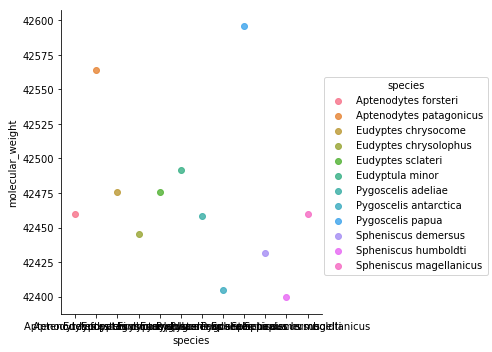

In [164]:
scatter_plot = sns.lmplot("species", "molecular_weight", data=penguins_df, hue='species', fit_reg=False)
scatter_plot.set_xlabel('')